In [215]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [216]:
pd.set_option('display.max_columns',None)

In [217]:
df = pd.read_csv("Consumer_Airfare_Report__Table_1a_-_All_U.S._Airport_Pair_Markets_20240712.csv")
df.head()

,tbl,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,airportid_1,airportid_2,airport_1,airport_2,nsmiles,passengers,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,Geocoded_City1,Geocoded_City2,tbl1apk
0,Table1a,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,14112,ABE,PIE,970,180,81.43,G4,1.0000,81.43,G4,1.0000,81.43,NaN,NaN,202131013514112ABEPIE
1,Table1a,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,15304,ABE,TPA,970,19,208.93,DL,0.4659,219.98,UA,0.1193,154.11,NaN,NaN,202131013515304ABETPA
2,Table1a,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11259,ABQ,DAL,580,204,184.56,WN,0.9968,184.44,WN,0.9968,184.44,NaN,NaN,202131014011259ABQDAL
3,Table1a,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11298,ABQ,DFW,580,264,182.64,AA,0.9774,183.09,AA,0.9774,183.09,NaN,NaN,202131014011298ABQDFW
4,Table1a,2021,3,30140,30466,"Albuquerque, NM","Phoenix, AZ",10140,14107,ABQ,PHX,328,398,177.11,WN,0.6061,184.49,AA,0.3939,165.77,NaN,NaN,202131014014107ABQPHX


Here is an explanation of each column in your flight routes to US dataset:

1. **`tbl`**: Indicates the table name or source reference. It seems to identify the specific dataset or table version being used, such as "Table1a."

2. **`Year`**: The year when the flight route data was recorded.

3. **`quarter`**: The quarter of the year in which the flight route data was recorded. Typically, quarters are divided as:
   - Q1: January - March
   - Q2: April - June
   - Q3: July - September
   - Q4: October - December

4. **`citymarketid_1`**: A unique identifier for the origin city market, which represents the larger metropolitan area or market of the departure city.

5. **`citymarketid_2`**: A unique identifier for the destination city market, representing the larger metropolitan area or market of the arrival city.

6. **`city1`**: The name of the origin city or metropolitan area.

7. **`city2`**: The name of the destination city or metropolitan area.

8. **`airportid_1`**: A unique identifier for the origin airport.

9. **`airportid_2`**: A unique identifier for the destination airport.

10. **`airport_1`**: The IATA airport code for the origin airport (e.g., "ABE" for Lehigh Valley International Airport in Allentown, PA).

11. **`airport_2`**: The IATA airport code for the destination airport (e.g., "PIE" for St. Pete–Clearwater International Airport in Tampa, FL).

12. **`nsmiles`**: The number of miles between the origin and destination airports, indicating the distance of the flight route.

13. **`passengers`**: The number of passengers that flew on the specified route within the recorded time period.

14. **`fare`**: The average fare paid by passengers on this route.

15. **`carrier_lg`**: The airline carrier code for the largest market share carrier on this route.

16. **`large_ms`**: The market share percentage of the largest carrier on this route.

17. **`fare_lg`**: The average fare charged by the largest carrier on this route.

18. **`carrier_low`**: The airline carrier code for the low-cost carrier on this route (if applicable).

19. **`lf_ms`**: The market share percentage of the low-cost carrier on this route.

20. **`fare_low`**: The average fare charged by the low-cost carrier on this route.

21. **`Geocoded_City1`**: Possibly geocoded data or geographic coordinates (latitude and longitude) for the origin city, though the values appear to be missing (`NaN`) in the sample data provided.

22. **`Geocoded_City2`**: Possibly geocoded data or geographic coordinates (latitude and longitude) for the destination city, also appearing to be missing (`NaN`) in the sample data.

23. **`tbl1apk`**: A unique identifier for each record in the dataset, which appears to be a combination of several other fields like year, quarter, city/airport IDs, and airport codes. This serves as a unique key to identify each specific flight route entry.

This dataset provides detailed information about flight routes between various U.S. cities, including passenger counts, fare information, and the carriers operating on these routes.

# Data Cleansing

In [218]:
df.head(2)


,tbl,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,airportid_1,airportid_2,airport_1,airport_2,nsmiles,passengers,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,Geocoded_City1,Geocoded_City2,tbl1apk
0,Table1a,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,14112,ABE,PIE,970,180,81.43,G4,1.0000,81.43,G4,1.0000,81.43,NaN,NaN,202131013514112ABEPIE
1,Table1a,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,15304,ABE,TPA,970,19,208.93,DL,0.4659,219.98,UA,0.1193,154.11,NaN,NaN,202131013515304ABETPA


In [219]:
df.drop(columns=['tbl','citymarketid_1','citymarketid_2','Geocoded_City1','Geocoded_City2',
                 'tbl1apk'], inplace=True)

In [220]:
df.dropna(subset=['carrier_lg','large_ms','fare_lg'],inplace=True)

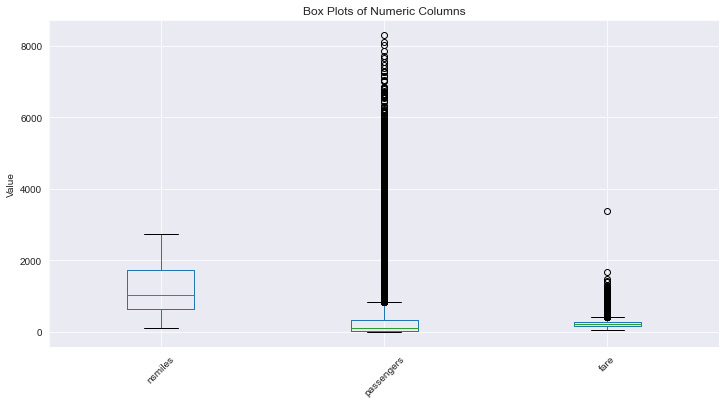

In [221]:
numeric_columns = ['nsmiles', 'passengers', 'fare']  # Specify numeric columns for box plots

# Create box plots
plt.figure(figsize=(12, 6))
df[numeric_columns].boxplot()
plt.title('Box Plots of Numeric Columns')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

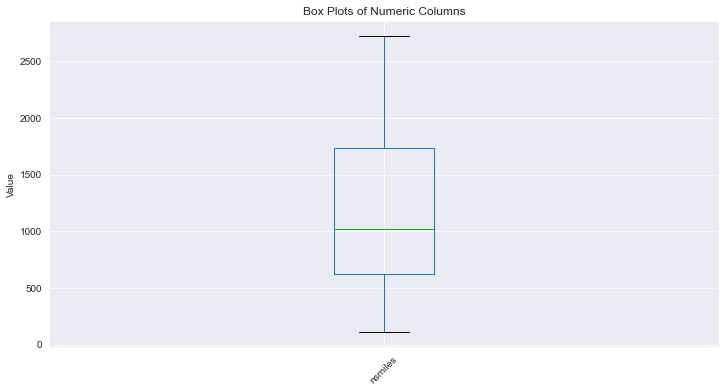

In [222]:
numeric_columns = ['nsmiles']  # Specify numeric columns for box plots

# Create box plots
plt.figure(figsize=(12, 6))
df[numeric_columns].boxplot()
plt.title('Box Plots of Numeric Columns')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

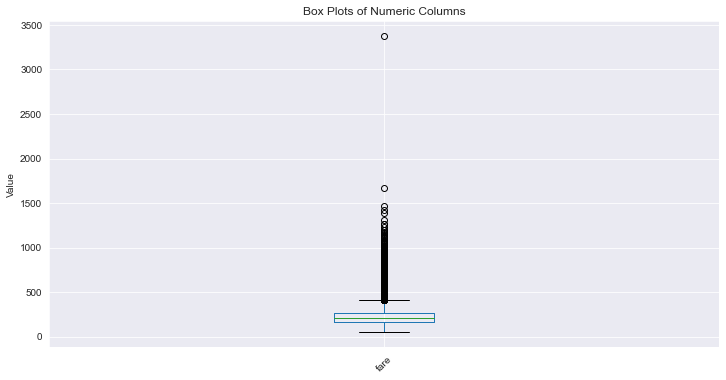

,Year,quarter,city1,city2,airportid_1,airportid_2,airport_1,airport_2,nsmiles,passengers,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low
20,2021,3,"Albuquerque, NM","New York City, NY (Metropolitan Area)",10140,15070,ABQ,SWF,1861,0,427.50,AA,1.0000,427.50,AA,1.0000,427.50
202,2021,3,"Albany, NY","Los Angeles, CA (Metropolitan Area)",10257,12892,ALB,LAX,2468,142,400.71,AA,0.3057,404.44,WN,0.1816,333.63
384,2021,3,"El Paso, TX","New York City, NY (Metropolitan Area)",11540,12391,ELP,ISP,1944,1,422.33,AA,0.5000,629.67,WN,0.5000,215.00
422,2021,3,"Cleveland, OH (Metropolitan Area)","New York City, NY (Metropolitan Area)",10874,12478,CAK,JFK,459,0,610.00,AA,1.0000,610.00,AA,1.0000,610.00
578,2021,3,"Boston, MA (Metropolitan Area)","New York City, NY (Metropolitan Area)",10721,12197,BOS,HPN,200,0,491.50,B6,1.0000,491.50,B6,1.0000,491.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245698,2024,1,"Los Angeles, CA (Metropolitan Area)","West Palm Beach/Palm Beach, FL",12954,14027,LGB,PBI,2330,0,611.50,DL,0.7500,738.33,WN,0.2500,231.00
245700,2024,1,"Los Angeles, CA (Metropolitan Area)","West Palm Beach/Palm Beach, FL",14908,14027,SNA,PBI,2330,34,540.32,AA,0.5903,510.54,AA,0.5903,510.54
245907,2024,1,"Bend/Redmond, OR","Los Angeles, CA (Metropolitan Area)",14489,12954,RDM,LGB,751,0,598.00,DL,1.0000,598.00,DL,1.0000,598.00
245927,2024,1,"Salt Lake City, UT","Washington, DC (Metropolitan Area)",14869,11278,SLC,DCA,1865,506,415.03,DL,0.5174,548.83,F9,0.1594,165.42


In [223]:
numeric_columns = ['fare']  # Specify numeric columns for box plots

# Create box plots
plt.figure(figsize=(12, 6))
df[numeric_columns].boxplot()
plt.title('Box Plots of Numeric Columns')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

df[df['fare']>400]

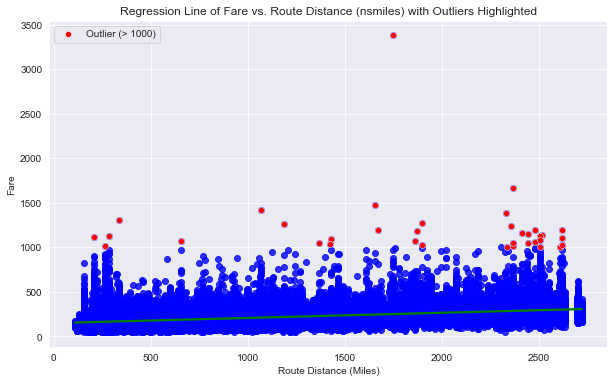

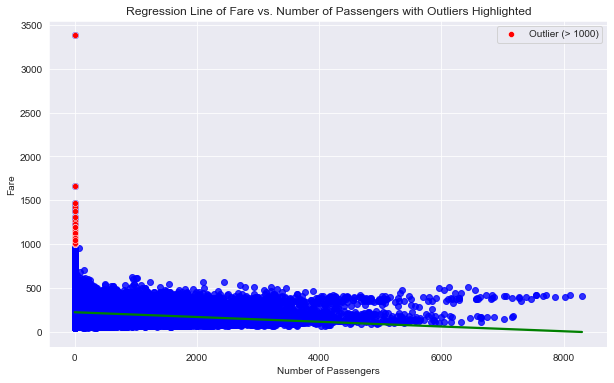

In [224]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot with regression line for fare vs. nsmiles
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='nsmiles', y='fare', scatter_kws={'color': 'blue'}, line_kws={'color': 'green'}, ci=None)
# Highlight outliers with fare > 1000 in red
sns.scatterplot(data=df[df['fare'] > 1000], x='nsmiles', y='fare', color='red', label='Outlier (> 1000)')
plt.title('Regression Line of Fare vs. Route Distance (nsmiles) with Outliers Highlighted')
plt.xlabel('Route Distance (Miles)')
plt.ylabel('Fare')
plt.legend(loc='upper left')
plt.show()

# Scatter plot with regression line for fare vs. passengers
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='passengers', y='fare', scatter_kws={'color': 'blue'}, line_kws={'color': 'green'}, ci=None)
# Highlight outliers with fare > 1000 in red
sns.scatterplot(data=df[df['fare'] > 1000], x='passengers', y='fare', color='red', label='Outlier (> 1000)')
plt.title('Regression Line of Fare vs. Number of Passengers with Outliers Highlighted')
plt.xlabel('Number of Passengers')
plt.ylabel('Fare')
plt.legend(loc='upper right')
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


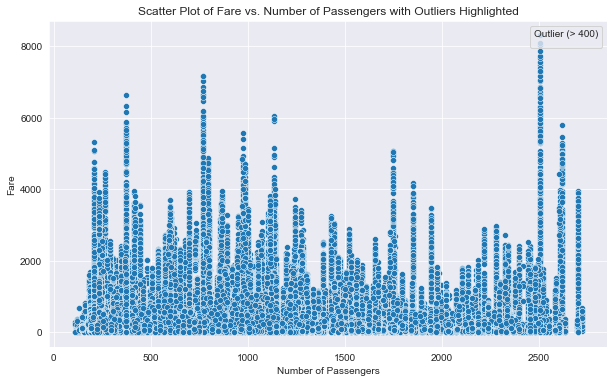

In [225]:
# Scatter plot of fare vs. passengers to detect outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='nsmiles', y='passengers', palette={True: 'red', False: 'blue'})
plt.title('Scatter Plot of Fare vs. Number of Passengers with Outliers Highlighted')
plt.xlabel('Number of Passengers')
plt.ylabel('Fare')
plt.legend(title='Outlier (> 400)', loc='upper right')
plt.show()

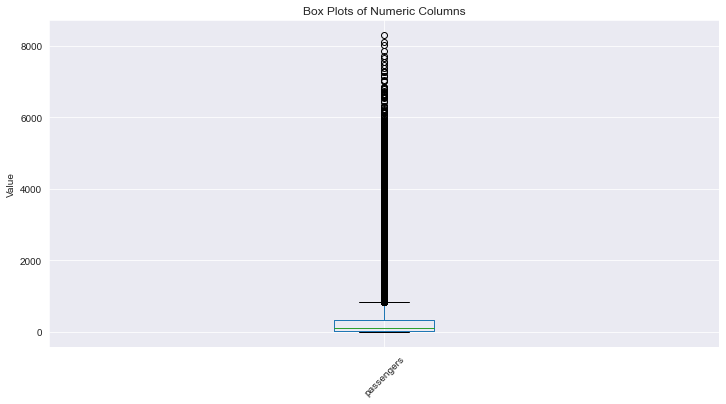

,Year,quarter,city1,city2,airportid_1,airportid_2,airport_1,airport_2,nsmiles,passengers,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low
46,2021,3,"Dallas/Fort Worth, TX","Denver, CO",11259,11292,DAL,DEN,651,1033,134.10,WN,0.9985,134.14,WN,0.9985,134.14
47,2021,3,"Dallas/Fort Worth, TX","Denver, CO",11298,11292,DFW,DEN,651,1904,134.51,AA,0.6307,141.57,UA,0.2787,135.21
51,2021,3,"Dallas/Fort Worth, TX","Phoenix, AZ",11298,14107,DFW,PHX,879,1027,178.45,AA,0.9076,184.17,NK,0.0493,92.39
55,2021,3,"Dallas/Fort Worth, TX","Seattle, WA",11298,14747,DFW,SEA,1670,1292,215.53,AA,0.4881,227.16,AS,0.4334,205.36
73,2021,3,"Dallas/Fort Worth, TX","Detroit, MI",11298,11433,DFW,DTW,986,1236,163.13,DL,0.4949,173.31,AA,0.4005,166.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245857,2024,1,"New Orleans, LA","New York City, NY (Metropolitan Area)",13495,12953,MSY,LGA,1218,1013,216.42,DL,0.3488,262.86,WN,0.2272,175.54
245865,2024,1,"San Diego, CA","San Francisco, CA (Metropolitan Area)",14679,13796,SAN,OAK,447,1346,159.95,WN,0.9160,164.59,NK,0.0793,104.35
245866,2024,1,"San Diego, CA","San Francisco, CA (Metropolitan Area)",14679,14771,SAN,SFO,447,1898,182.54,UA,0.3511,204.77,WN,0.3372,152.24
245867,2024,1,"San Diego, CA","San Francisco, CA (Metropolitan Area)",14679,14831,SAN,SJC,447,2020,154.45,WN,0.7969,154.15,WN,0.7969,154.15


In [226]:
numeric_columns = ['passengers']  # Specify numeric columns for box plots

# Create box plots
plt.figure(figsize=(12, 6))
df[numeric_columns].boxplot()
plt.title('Box Plots of Numeric Columns')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

df[df['passengers']>1000]

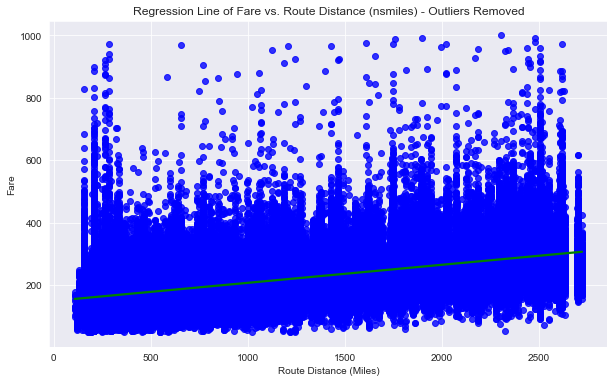

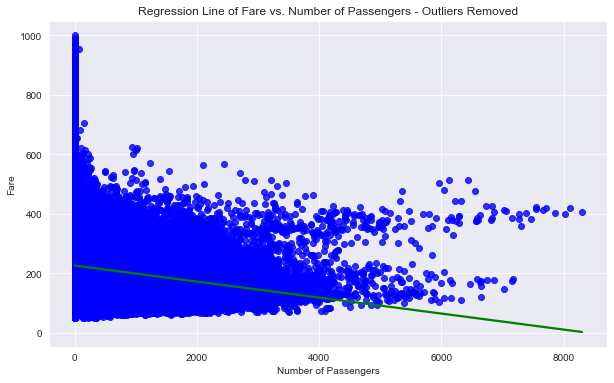

Filtered DataFrame without outliers:


,Year,quarter,city1,city2,airportid_1,airportid_2,airport_1,airport_2,nsmiles,passengers,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low
0,2021,3,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,14112,ABE,PIE,970,180,81.43,G4,1.0000,81.43,G4,1.0000,81.43
1,2021,3,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,15304,ABE,TPA,970,19,208.93,DL,0.4659,219.98,UA,0.1193,154.11
2,2021,3,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11259,ABQ,DAL,580,204,184.56,WN,0.9968,184.44,WN,0.9968,184.44
3,2021,3,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11298,ABQ,DFW,580,264,182.64,AA,0.9774,183.09,AA,0.9774,183.09
4,2021,3,"Albuquerque, NM","Phoenix, AZ",10140,14107,ABQ,PHX,328,398,177.11,WN,0.6061,184.49,AA,0.3939,165.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245950,2024,1,"Knoxville, TN","New York City, NY (Metropolitan Area)",15412,12953,TYS,LGA,665,207,278.70,DL,0.7503,287.44,AA,0.2359,248.46
245951,2024,1,"Knoxville, TN","Miami, FL (Metropolitan Area)",15412,11697,TYS,FLL,724,277,148.69,G4,0.8255,114.45,G4,0.8255,114.45
245952,2024,1,"Knoxville, TN","Miami, FL (Metropolitan Area)",15412,13303,TYS,MIA,724,70,330.19,AA,0.8057,321.92,AA,0.8057,321.92
245953,2024,1,"Knoxville, TN","Tampa, FL (Metropolitan Area)",15412,14112,TYS,PIE,550,178,95.65,G4,1.0000,95.65,G4,1.0000,95.65


In [227]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out rows where fare > 1000
df = df[df['fare'] <= 1000]

# Scatter plot with regression line for fare vs. nsmiles (filtered)
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='nsmiles', y='fare', scatter_kws={'color': 'blue'}, line_kws={'color': 'green'}, ci=None)
plt.title('Regression Line of Fare vs. Route Distance (nsmiles) - Outliers Removed')
plt.xlabel('Route Distance (Miles)')
plt.ylabel('Fare')
plt.show()

# Scatter plot with regression line for fare vs. passengers (filtered)
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='passengers', y='fare', scatter_kws={'color': 'blue'}, line_kws={'color': 'green'}, ci=None)
plt.title('Regression Line of Fare vs. Number of Passengers - Outliers Removed')
plt.xlabel('Number of Passengers')
plt.ylabel('Fare')
plt.show()

# Display the filtered DataFrame
print("Filtered DataFrame without outliers:")
df


In [228]:
# def remove_outliers_iqr(df, column):
#     Q1 = df[column].quantile(0.25)
#     Q3 = df[column].quantile(0.75)
#     IQR = Q3 - Q1
    
#     # Define bounds for filtering
#     lower_bound = Q1 - 2 * IQR
#     upper_bound = Q3 + 2 * IQR
    
#     # Filter the DataFrame
#     return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# # Step 3: Remove outliers for each specified numeric column
# for column in numeric_columns:
#     df = remove_outliers_iqr(df, column)

# # The DataFrame 'df' now contains the filtered data without outliers
# print("Filtered DataFrame without outliers:")
# df

In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244378 entries, 0 to 245954
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         244378 non-null  int64  
 1   quarter      244378 non-null  int64  
 2   city1        244378 non-null  object 
 3   city2        244378 non-null  object 
 4   airportid_1  244378 non-null  int64  
 5   airportid_2  244378 non-null  int64  
 6   airport_1    244378 non-null  object 
 7   airport_2    244378 non-null  object 
 8   nsmiles      244378 non-null  int64  
 9   passengers   244378 non-null  int64  
 10  fare         244378 non-null  float64
 11  carrier_lg   244378 non-null  object 
 12  large_ms     244378 non-null  float64
 13  fare_lg      244378 non-null  float64
 14  carrier_low  244306 non-null  object 
 15  lf_ms        244306 non-null  float64
 16  fare_low     244306 non-null  float64
dtypes: float64(5), int64(6), object(6)
memory usage: 33.6+ MB


# 1. Travel Demand Analysis

In [230]:
df.dropna(subset=['carrier_low','lf_ms','fare_low'],inplace=True)

Binned Fare Summary:
      Fare Binned  passengers      nsmiles
0        Low Fare     4721922   466.993704
1     Medium Fare    39119358   889.858657
2       High Fare    23273053  1337.278692
3  Very High Fare     5721204  1826.689239


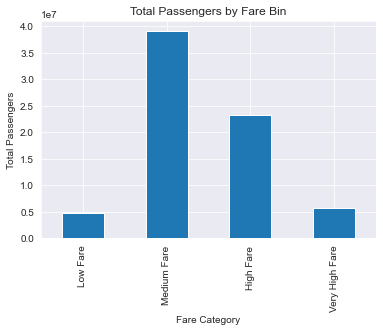

In [231]:
bins = [0, 100, 200, 300, 400]  # Custom bin edges
labels = ['Low Fare', 'Medium Fare', 'High Fare', 'Very High Fare']

# Step 2: Apply binning using pd.cut()
df['Fare Binned'] = pd.cut(df['fare'], bins=bins, labels=labels, right=False)

# Alternatively, use pd.qcut() to create quantile-based bins
# df['Fare Binned'] = pd.qcut(df['fare'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

# Step 3: Analyze the binned data
# Group by the new binned column and aggregate other metrics
binned_summary = df.groupby('Fare Binned').agg({
    'passengers': 'sum',   # Example: Total passengers per fare bin
    'nsmiles': 'mean'      # Example: Average miles per fare bin
}).reset_index()

# Display the summary
print("Binned Fare Summary:")
print(binned_summary)

# Visualize the binned data
import matplotlib.pyplot as plt

binned_summary.plot(kind='bar', x='Fare Binned', y='passengers', legend=False)
plt.title('Total Passengers by Fare Bin')
plt.ylabel('Total Passengers')
plt.xlabel('Fare Category')
plt.show()


Binned Fare Summary:
  Fare Binned  passengers      nsmiles
0          Q1    27979283   721.049297
1          Q2    19280942  1043.872659
2          Q3    14031151  1275.694866
3          Q4    12364000  1716.727259


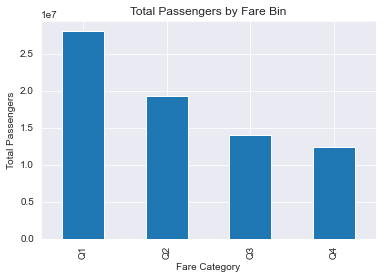

In [97]:
# bins = [0, 100, 200, 300, 400]  # Custom bin edges
# labels = ['Low Fare', 'Medium Fare', 'High Fare', 'Very High Fare']

# # Step 2: Apply binning using pd.cut()
# # df['Fare Binned'] = pd.cut(df['fare'], bins=bins, labels=labels, right=False)

# # Alternatively, use pd.qcut() to create quantile-based bins
# df['Fare Binned'] = pd.qcut(df['fare'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

# # Step 3: Analyze the binned data
# # Group by the new binned column and aggregate other metrics
# binned_summary = df.groupby('Fare Binned').agg({
#     'passengers': 'sum',   # Example: Total passengers per fare bin
#     'nsmiles': 'mean'      # Example: Average miles per fare bin
# }).reset_index()

# # Display the summary
# print("Binned Fare Summary:")
# print(binned_summary)

# # Visualize the binned data
# import matplotlib.pyplot as plt

# binned_summary.plot(kind='bar', x='Fare Binned', y='passengers', legend=False)
# plt.title('Total Passengers by Fare Bin')
# plt.ylabel('Total Passengers')
# plt.xlabel('Fare Category')
# plt.show()


**Visualizations:**

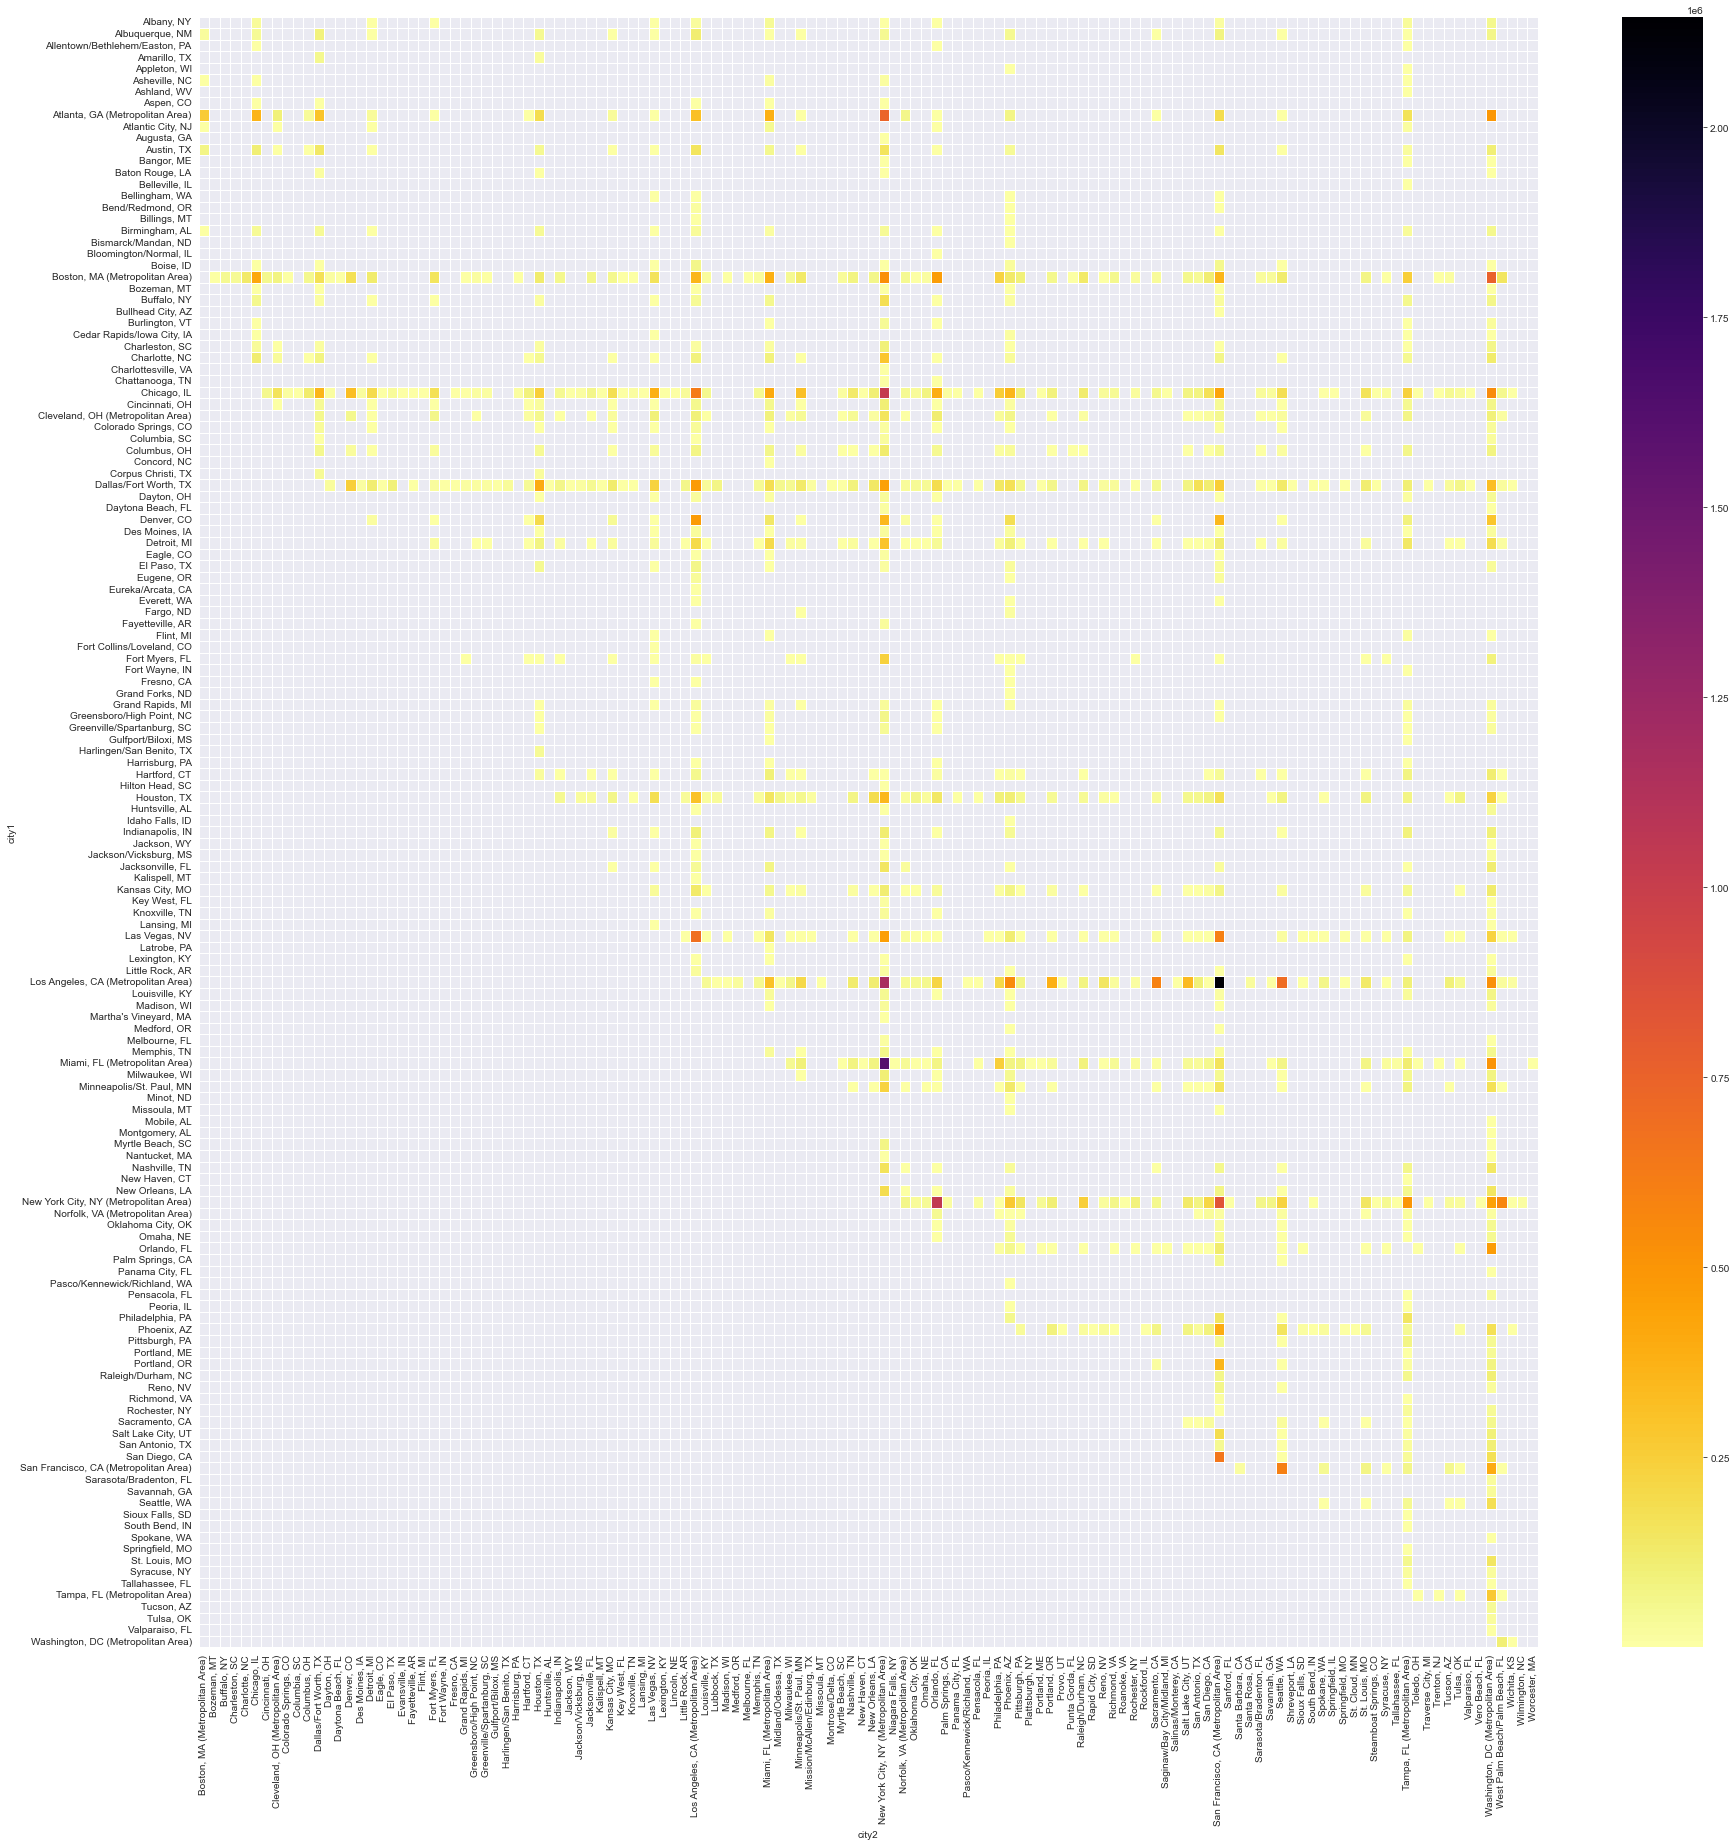

In [232]:
#Heatmap: To show passenger traffic between different city pairs.
traffic_matrix = df.pivot_table(index='city1',columns='city2',values='passengers', aggfunc='sum')
sns.set_style("darkgrid")
plt.figure(figsize=(30,30))
sns.heatmap(traffic_matrix, cmap='inferno_r', linewidth=1)
plt.show()

Top 3 Most Popular City Pairs by Passenger Traffic:
                                   city1  \
932  Los Angeles, CA (Metropolitan Area)   
978        Miami, FL (Metropolitan Area)   
911  Los Angeles, CA (Metropolitan Area)   

                                     city2  passengers  
932  San Francisco, CA (Metropolitan Area)     2145874  
978  New York City, NY (Metropolitan Area)     1610441  
911  New York City, NY (Metropolitan Area)     1173011  


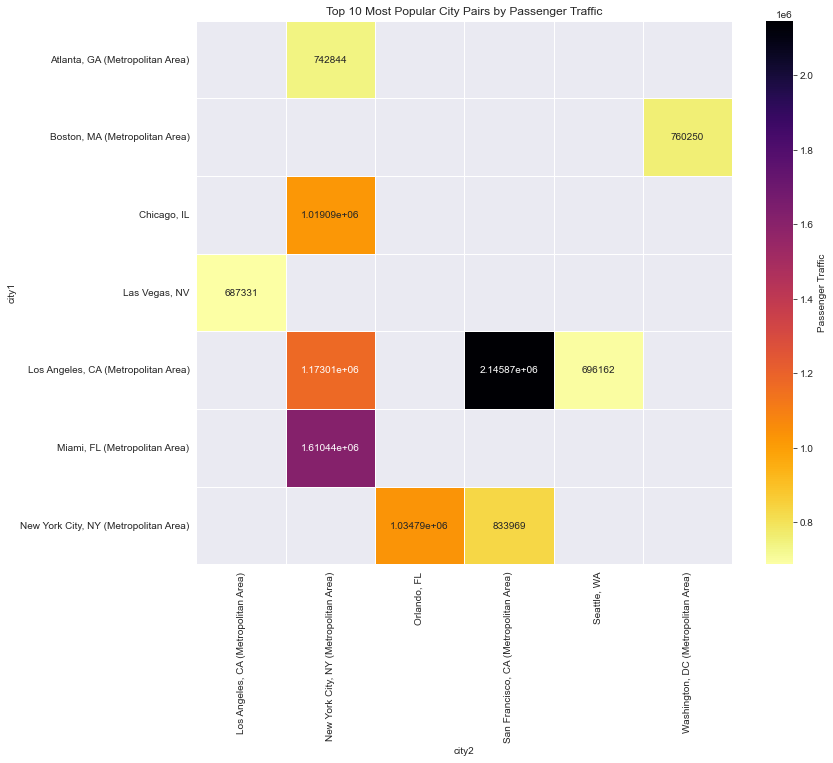

In [233]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Grouping data to calculate the total passengers for each city pair
traffic_data = df.groupby(['city1', 'city2'])['passengers'].sum().reset_index()

# Sorting by passenger count to get the top 10 most popular city pairs
top_10_traffic = traffic_data.sort_values(by='passengers', ascending=False).head(10)

# Print the top 3 city pairs (most popular travels)
print("Top 3 Most Popular City Pairs by Passenger Traffic:")
print(top_10_traffic.head(3))

# Create a new DataFrame for the heatmap with just the top 10 city pairs
top_10_matrix = top_10_traffic.pivot_table(index='city1', columns='city2', values='passengers', aggfunc='sum')

# Set style and figure size
sns.set_style("darkgrid")
plt.figure(figsize=(12, 10))

# Plotting the heatmap for top 10 city pairs
sns.heatmap(top_10_matrix, cmap='inferno_r', annot=True, fmt='g', linewidths=1, cbar_kws={'label': 'Passenger Traffic'})
plt.title('Top 10 Most Popular City Pairs by Passenger Traffic')
plt.show()


quarter
1    17778320
2    18989251
3    18376144
4    18511661
Name: passengers, dtype: int64


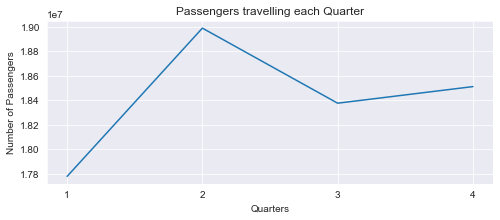

In [234]:
#Time Series Plot: Display the number of passengers over time to observe seasonal variations.
quarter_passengers = df.groupby('quarter')['passengers'].sum()
print(quarter_passengers)
plt.figure(figsize=(8,3))
sns.lineplot(x=quarter_passengers.index, y=quarter_passengers.values)
plt.xticks([1,2,3,4])
plt.title("Passengers travelling each Quarter")
plt.xlabel("Quarters")
plt.ylabel("Number of Passengers")
plt.show()

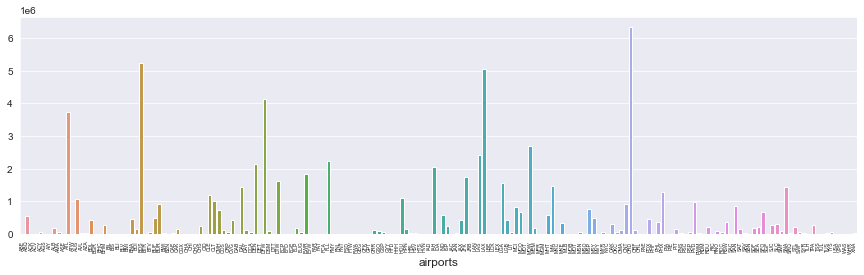

In [235]:
#Bar Plot: Compare the number of passengers by route or airport.
airport_passenger = df.groupby('airport_1')['passengers'].sum()
plt.figure(figsize=(15,4))
sns.barplot(x=airport_passenger.index, y=airport_passenger.values)
plt.xlabel("airports", fontsize=12)
plt.xticks(rotation=90, fontsize=5)
plt.show()

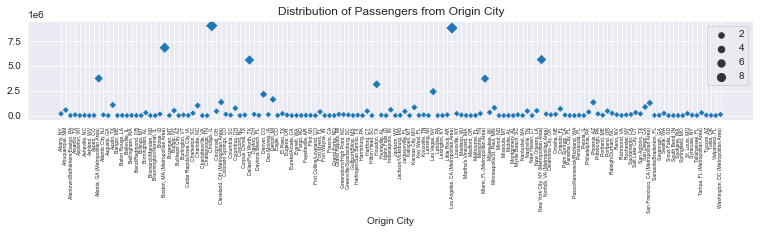

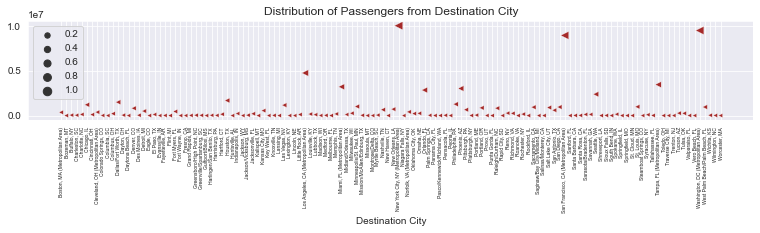

Top Origin Airports (Based on Passengers):
city1
Chicago, IL                              9038221
Los Angeles, CA (Metropolitan Area)      8804645
Boston, MA (Metropolitan Area)           6826820
New York City, NY (Metropolitan Area)    5627209
Dallas/Fort Worth, TX                    5588540
Name: passengers, dtype: int64

Top Destination Airports (Based on Passengers):
city2
New York City, NY (Metropolitan Area)    10061709
Washington, DC (Metropolitan Area)        9525028
San Francisco, CA (Metropolitan Area)     8974700
Los Angeles, CA (Metropolitan Area)       4766922
Tampa, FL (Metropolitan Area)             3466369
Name: passengers, dtype: int64


In [236]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Calculate total passengers for each origin (city1) and destination (city2)
city1_passengers = df.groupby('city1')['passengers'].sum()
city2_passengers = df.groupby('city2')['passengers'].sum()

# Plotting the distribution of passengers for Origin City (city1)
plt.figure(figsize=(13,4))
plt.subplot(2,1,1)
sns.scatterplot(x=city1_passengers.index, y=city1_passengers.values, marker='D', size=city1_passengers.values)
plt.xticks(rotation=90, fontsize=5)
plt.title("Distribution of Passengers from Origin City")
plt.xlabel("Origin City")

# Plotting the distribution of passengers for Destination City (city2)
plt.figure(figsize=(13,4))
plt.subplot(2,1,2)
sns.scatterplot(x=city2_passengers.index, y=city2_passengers.values, marker='<', color='brown', size=city2_passengers.values)
plt.xticks(rotation=90, fontsize=5)
plt.title("Distribution of Passengers from Destination City")
plt.xlabel("Destination City")

plt.show()

# Now, let's print the major airports based on passenger traffic
# You can choose the top N major cities based on the total number of passengers
top_n = 5  # You can adjust this value based on how many major cities you want to display
major_airports_origin = city1_passengers.nlargest(top_n)
major_airports_destination = city2_passengers.nlargest(top_n)

# Print the major airports
print("Top Origin Airports (Based on Passengers):")
print(major_airports_origin)

print("\nTop Destination Airports (Based on Passengers):")
print(major_airports_destination)


**Statistical Analysis:**

In [237]:
#Descriptive Statistics: Calculate mean, median, and standard deviation of passenger counts.
df['passengers'].describe()

count    244306.000000
mean        301.488199
std         512.523839
min           0.000000
25%          22.000000
50%         114.000000
75%         342.000000
max        8301.000000
Name: passengers, dtype: float64

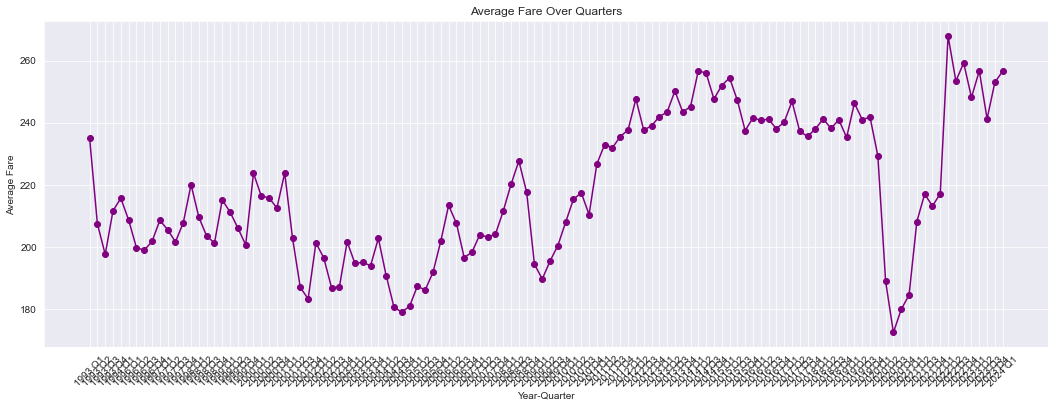

In [238]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate the average fare per quarter for each year
quarterly_avg_fare = df.groupby(['Year', 'quarter'])['fare'].mean().reset_index()

# Create a combined 'Year-Quarter' column for easy plotting
quarterly_avg_fare['Year-Quarter'] = quarterly_avg_fare['Year'].astype(str) + ' Q' + quarterly_avg_fare['quarter'].astype(str)

# Plotting the average fare per quarter over the years
plt.figure(figsize=(18, 6))
plt.plot(quarterly_avg_fare['Year-Quarter'], quarterly_avg_fare['fare'], color='purple', marker='o')
plt.xticks(rotation=45)
plt.title("Average Fare Over Quarters")
plt.xlabel("Year-Quarter")
plt.ylabel("Average Fare")
plt.grid(True)
plt.show()


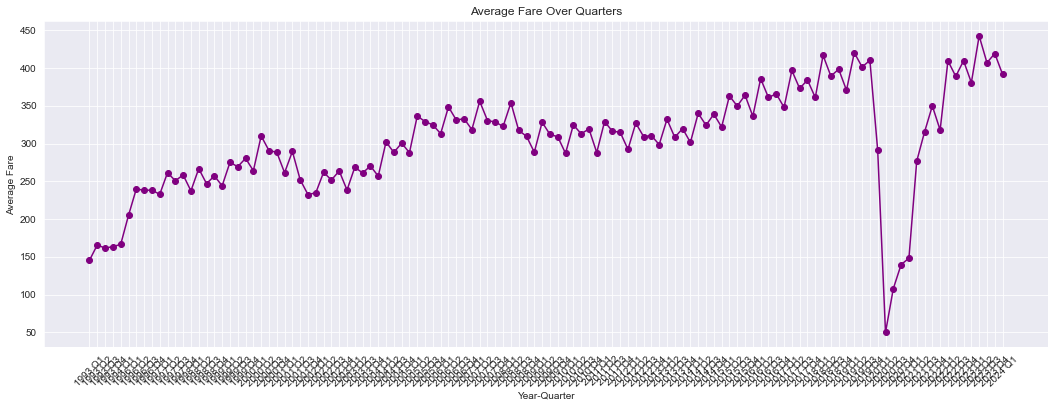

In [125]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate the average fare per quarter for each year
quarterly_avg_fare = df.groupby(['Year', 'quarter'])['passengers'].mean().reset_index()

# Create a combined 'Year-Quarter' column for easy plotting
quarterly_avg_fare['Year-Quarter'] = quarterly_avg_fare['Year'].astype(str) + ' Q' + quarterly_avg_fare['quarter'].astype(str)

# Plotting the average fare per quarter over the years
plt.figure(figsize=(18, 6))
plt.plot(quarterly_avg_fare['Year-Quarter'], quarterly_avg_fare['passengers'], color='purple', marker='o')
plt.xticks(rotation=45)
plt.title("Average Fare Over Quarters")
plt.xlabel("Year-Quarter")
plt.ylabel("Average Fare")
plt.grid(True)
plt.show()


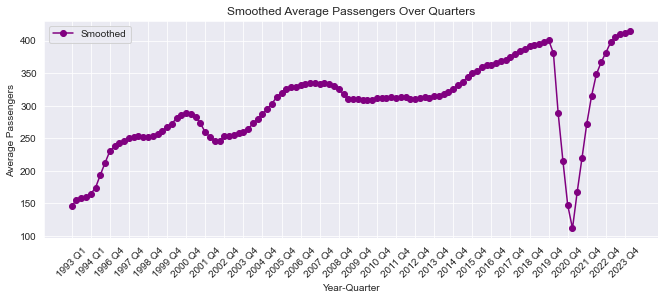

In [239]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate the average fare per quarter for each year
quarterly_avg_fare = df.groupby(['Year', 'quarter'])['passengers'].mean().reset_index()

# Create a combined 'Year-Quarter' column for easy plotting
quarterly_avg_fare['Year-Quarter'] = quarterly_avg_fare['Year'].astype(str) + ' Q' + quarterly_avg_fare['quarter'].astype(str)

# Apply a simple moving average (SMA) with a window size of 4 (for smoothing the data over 4 quarters, adjust as needed)
quarterly_avg_fare['Smoothed_Passengers'] = quarterly_avg_fare['passengers'].rolling(window=4, min_periods=1).mean()

# Plotting the smoothed average fare per quarter over the years
plt.figure(figsize=(11, 4))
plt.plot(quarterly_avg_fare['Year-Quarter'], quarterly_avg_fare['Smoothed_Passengers'], color='purple', marker='o', label='Smoothed')
plt.xticks(rotation=45)

# Reduce the number of x-ticks to decrease the x-axis scale
plt.xticks(quarterly_avg_fare['Year-Quarter'][::4])  # Show every 4th label to reduce the number of ticks

plt.title("Smoothed Average Passengers Over Quarters")
plt.xlabel("Year-Quarter")
plt.ylabel("Average Passengers")
plt.legend()
plt.grid(True)
plt.show()


Text(0.5, 1.0, 'Passenger traffic over the years')

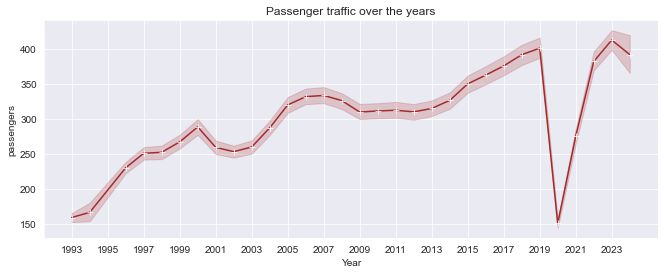

In [240]:
#Trend Analysis: Identify trends in passenger traffic over years.
plt.figure(figsize=(11,4))
sns.lineplot(x='Year', y='passengers', data=df, marker='+', color='brown')
plt.xticks(range(1993, 2025, 2))
plt.title("Passenger traffic over the years")
# plt.show()

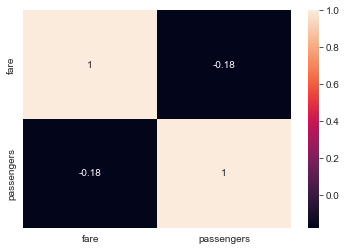

In [241]:
#Correlation Analysis: Explore correlations between fare prices and passenger volume.
price_passenger = df[['fare', 'passengers']]
sns.heatmap(price_passenger.corr(), annot=True)
plt.show()

In [242]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder() 

cols = ["carrier_lg", "carrier_low", "airport_1", "airport_2"]

for col in cols:
    # Encode labels in column 'species'. 
    df[col]= label_encoder.fit_transform(df[col]) 

    df[col].unique()

In [243]:
df_corr = df[['Year', 'airportid_1', 'airportid_2', 'fare','carrier_low','carrier_lg']]

In [244]:
df_corr.head()

,Year,airportid_1,airportid_2,fare,carrier_low,carrier_lg
0,2021,10135,14112,81.43,19,16
1,2021,10135,15304,208.93,55,11
2,2021,10140,11259,184.56,61,57
3,2021,10140,11298,182.64,5,4
4,2021,10140,14107,177.11,5,57


In [245]:
df_corr = df_corr.corr()

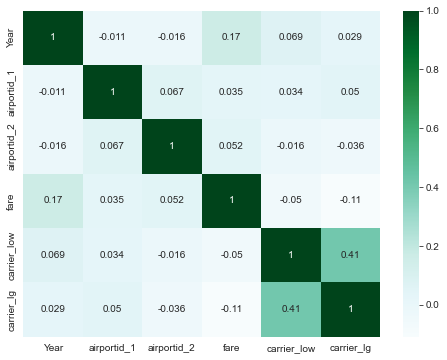

In [246]:
plt.figure(figsize = (8, 6))
sns.heatmap(data = df_corr, annot = True, cmap = 'BuGn')
plt.show()

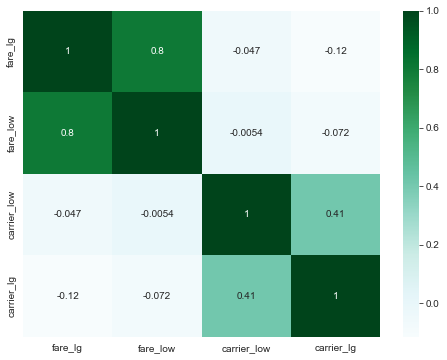

In [250]:
df_corr = df[["fare_lg","fare_low",'carrier_low','carrier_lg']]
df_corr = df_corr.corr()
plt.figure(figsize = (8, 6))
sns.heatmap(data = df_corr, annot = True, cmap = 'BuGn')
plt.show()

In [252]:
df.drop(columns=['Fare Binned'], inplace=True)
y = df[["fare"]]
x = df.drop("fare", axis=1)
df = df.dropna()
df.isnull().sum()
# text = " ".join(i for i in df.city2)  # butun satirlar tek metinde kaydedilir
# from wordcloud import WordCloud, STOPWORDS
# wordcloud = WordCloud().generate(text)
# plt.imshow(wordcloud, interpolation="bilinear")
# plt.axis("off")
# plt.figure(figsize=[40, 30])
# plt.show()

Year           0
quarter        0
airportid_1    0
airportid_2    0
airport_1      0
airport_2      0
nsmiles        0
passengers     0
fare           0
carrier_lg     0
large_ms       0
fare_lg        0
carrier_low    0
lf_ms          0
fare_low       0
dtype: int64

In [253]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.70,random_state=22)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 239042 entries, 0 to 245954
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         239042 non-null  int64  
 1   quarter      239042 non-null  int64  
 2   airportid_1  239042 non-null  int64  
 3   airportid_2  239042 non-null  int64  
 4   airport_1    239042 non-null  int32  
 5   airport_2    239042 non-null  int32  
 6   nsmiles      239042 non-null  int64  
 7   passengers   239042 non-null  int64  
 8   fare         239042 non-null  float64
 9   carrier_lg   239042 non-null  int32  
 10  large_ms     239042 non-null  float64
 11  fare_lg      239042 non-null  float64
 12  carrier_low  239042 non-null  int32  
 13  lf_ms        239042 non-null  float64
 14  fare_low     239042 non-null  float64
dtypes: float64(5), int32(4), int64(6)
memory usage: 25.5 MB


In [254]:
lm = LinearRegression()
model=lm.fit(x,y)

In [255]:
model.score(x, y)

0.9443610995229713

In [256]:
lm = LinearRegression()
model = lm.fit(x_train,y_train)
model.score(x_test,y_test)

0.9450163100956688

In [257]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(x_train, y_train)
y_test_p = knn.predict(x_test)

In [258]:
knn.score(x_test, y_test)

0.9289283281970935

**Insights from Travel demand Analysis graphs are as follows :**

### Highest active traffic routes
- Miami Florida to Niagara Falls NY
- Louisville KY to San Diego CA
- New York City NY to Omaha NE

### Highest busy quarter every year
- passengers have travelled mostly in second quarter i.e. in the month of April, May and June

### Major Airports:
- **ORD**: O'Hare International Airport (Chicago, IL)
- **BOS**: Logan International Airport (Boston, MA)
- **LAX**: Los Angeles International Airport (Los Angeles, CA)

### Smaller or Unusual Codes:
- **TSS**: East 34th Street Heliport (New York, NY) - This is a heliport, not a regular airport.
- **HFD**: Hartford-Brainard Airport (Hartford, CT)
- **JRB**: Downtown Manhattan/Wall Street Heliport (New York, NY) - This is also a heliport.

Note that **TSS** and **JRB** are heliports, which explains why their passenger counts might be zero, as they primarily handle helicopter traffic rather than regular commercial flights.


### Highest distribution of passengers in cities are - 
- **city1 - from route** : Chicago IL, Los Angeles
- **city2 - to route** : Newyork City NY, Washington DC

### Passenger Traffic over the years:
- Major decline in passengers is in the year 2020 due to covid 19.
- Later on the numbers in passenger count increased extensively with 2023 being the highest passenger traffic year

### Correlation between fare prices and volume of passengers
- Weak Negative Correlation (-0.18): This suggests that as fare prices increase, the number of passengers tends to decrease slightly, but the relationship is not strong. In other words, higher fares might lead to a small reduction in passenger numbers, but many other factors could influence this relationship.

# 2. Market Research


**Visualization**

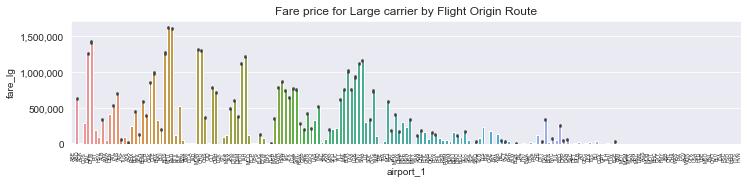

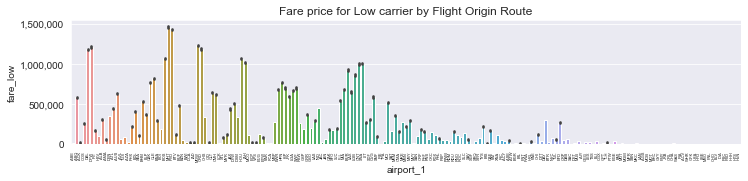

In [20]:
#Bar Plot: Compare fare prices across different carriers for the same route.
import matplotlib.ticker as mticker
plt.figure(figsize=(12,5))
plt.subplot(2,1,1)
sns.barplot(y='fare_lg', x='airport_1', data=df, estimator=sum)
plt.xticks(rotation=90, fontsize=5)
plt.title("Fare price for Large carrier by Flight Origin Route")
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.figure(figsize=(12,5))
plt.subplot(2,1,2)
sns.barplot(y='fare_low', x='airport_1', data=df, estimator=sum)
plt.xticks(rotation=90, fontsize=4)
plt.title("Fare price for Low carrier by Flight Origin Route")
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.show()

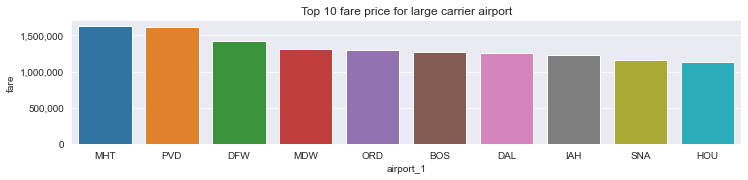

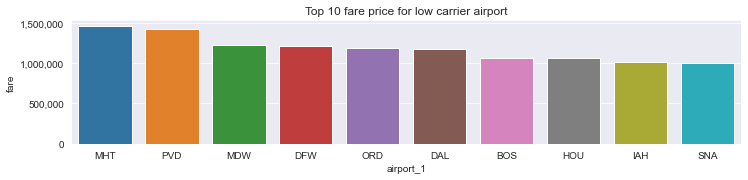

In [21]:

fare_lg_airport_1 = df.groupby("airport_1")['fare_lg'].sum()
fare_lg_airport_1 = fare_lg_airport_1.sort_values(ascending=False).head(10)
fare_low_airport_1 = df.groupby("airport_1")['fare_low'].sum()
fare_low_airport_1 = fare_low_airport_1.sort_values(ascending=False).head(10)

import matplotlib.ticker as mticker
plt.figure(figsize=(12,5))
plt.subplot(2,1,1)
sns.barplot(x=fare_lg_airport_1.index, y=fare_lg_airport_1.values)
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.ylabel("fare")
plt.title("Top 10 fare price for large carrier airport")

plt.figure(figsize=(12,5))
plt.subplot(2,1,2)
sns.barplot(x=fare_low_airport_1.index, y=fare_low_airport_1.values)
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.ylabel("fare")
plt.title("Top 10 fare price for low carrier airport")

plt.show()

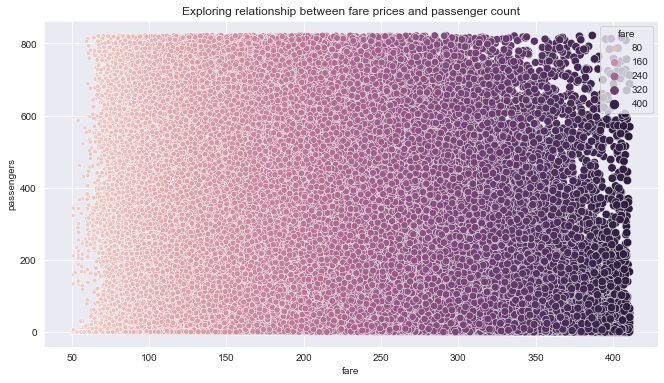

In [22]:
#Scatter Plot: Analyze the relationship between fare prices and passenger count.
plt.figure(figsize=(11,6))
sns.scatterplot(x='fare', y='passengers', data=df, hue='fare', size='fare')
plt.title("Exploring relationship between fare prices and passenger count")
plt.show()

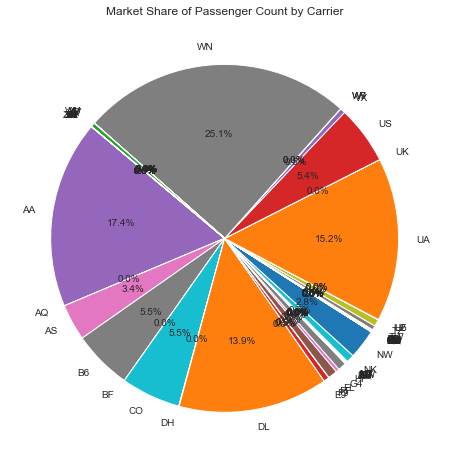

In [135]:
carrier_passenger_share = df.groupby('carrier_lg')['passengers'].sum()
plt.figure(figsize=(8, 8))
plt.pie(carrier_passenger_share, labels=carrier_passenger_share.index, autopct='%1.1f%%', startangle=140)
plt.title("Market Share of Passenger Count by Carrier")
plt.show()


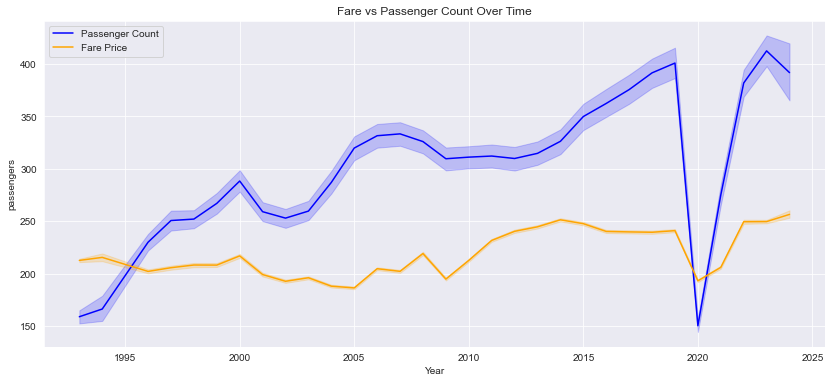

In [139]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x='Year', y='passengers', color='blue', label='Passenger Count')
sns.lineplot(data=df, x='Year', y='fare', color='orange', label='Fare Price')
plt.title("Fare vs Passenger Count Over Time")
plt.xlabel("Year")
plt.legend()
plt.show()


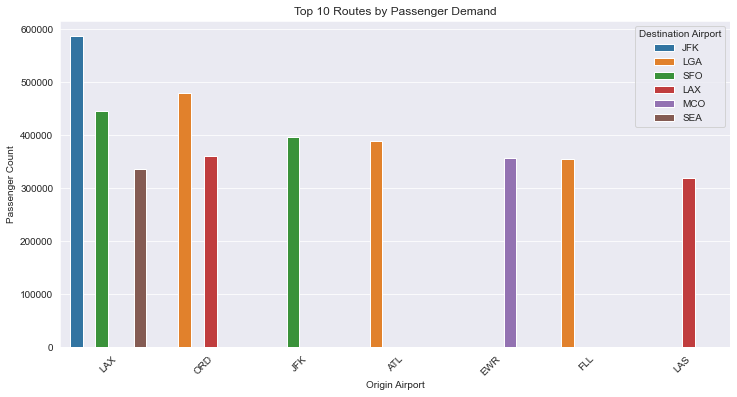

In [140]:
route_demand = df.groupby(['airport_1', 'airport_2'])['passengers'].sum().reset_index()
route_demand = route_demand.sort_values(by='passengers', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(y='passengers', x='airport_1', hue='airport_2', data=route_demand)
plt.xticks(rotation=45)
plt.title("Top 10 Routes by Passenger Demand")
plt.xlabel("Origin Airport")
plt.ylabel("Passenger Count")
plt.legend(title="Destination Airport")
plt.show()


In [142]:
from sklearn.preprocessing import OneHotEncoder

# Selecting relevant categorical columns for encoding
categorical_cols = ['airport_1', 'airport_2', 'carrier_lg']
encoder = OneHotEncoder(sparse=False)

# Apply one-hot encoding
encoded_features = encoder.fit_transform(df[categorical_cols])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_cols))

# Combine the original data with encoded features
df_encoded = pd.concat([df, encoded_df], axis=1)


# What is the distribution of carrier_lg and carrier_low market shares?

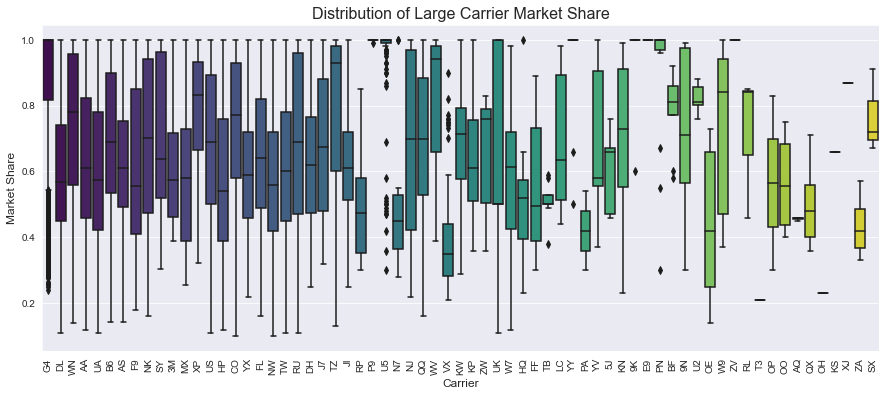

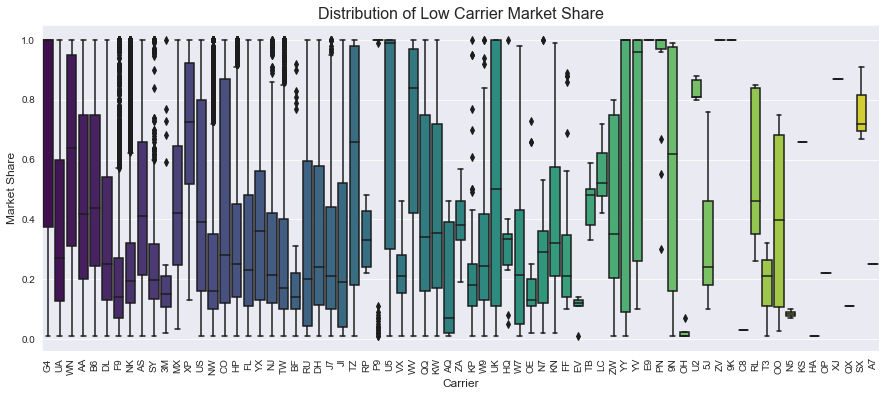

In [151]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='carrier_lg', y='large_ms', data=df,palette='viridis')
plt.title('Distribution of Large Carrier Market Share', fontsize=16)
plt.xlabel('Carrier', fontsize=12)
plt.xticks(rotation=90)
plt.ylabel('Market Share', fontsize=12)
plt.show()

# Box plot for low carrier market share
plt.figure(figsize=(15, 6))
sns.boxplot(x='carrier_low', y='lf_ms', data=df,palette='viridis')
plt.title('Distribution of Low Carrier Market Share', fontsize=16)
plt.xlabel('Carrier', fontsize=12)
plt.xticks(rotation=90)
plt.ylabel('Market Share', fontsize=12)
plt.show()

# How do fare and passenger counts vary across different carrier_lg?

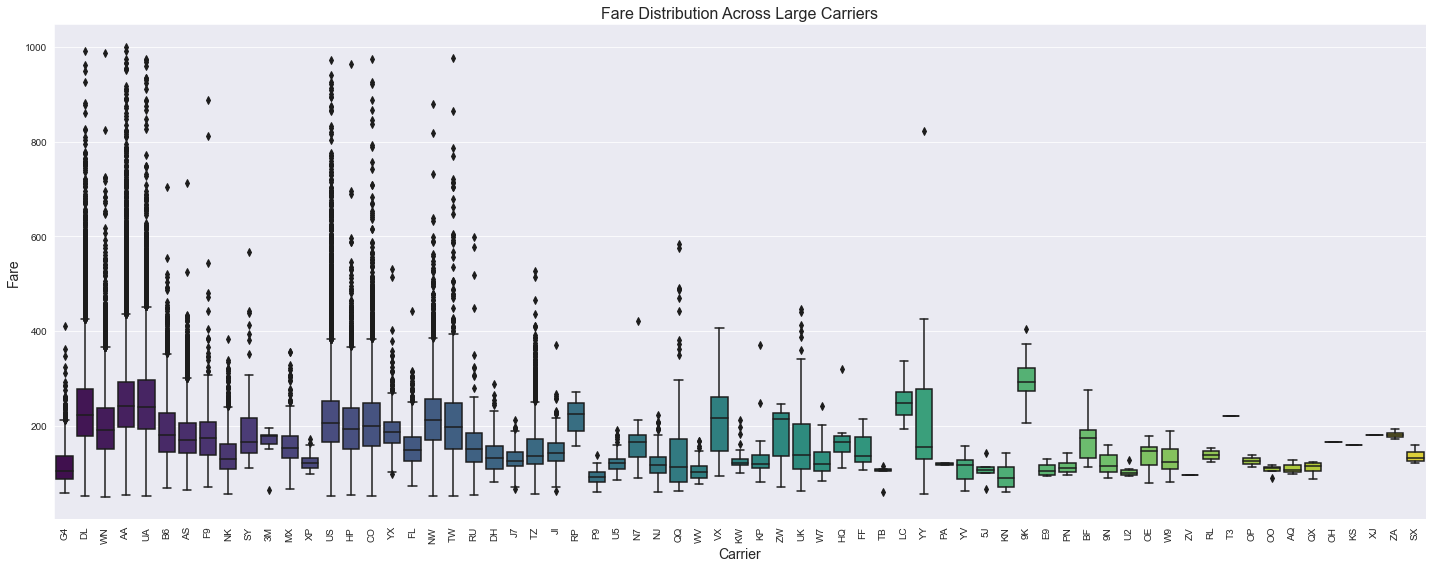

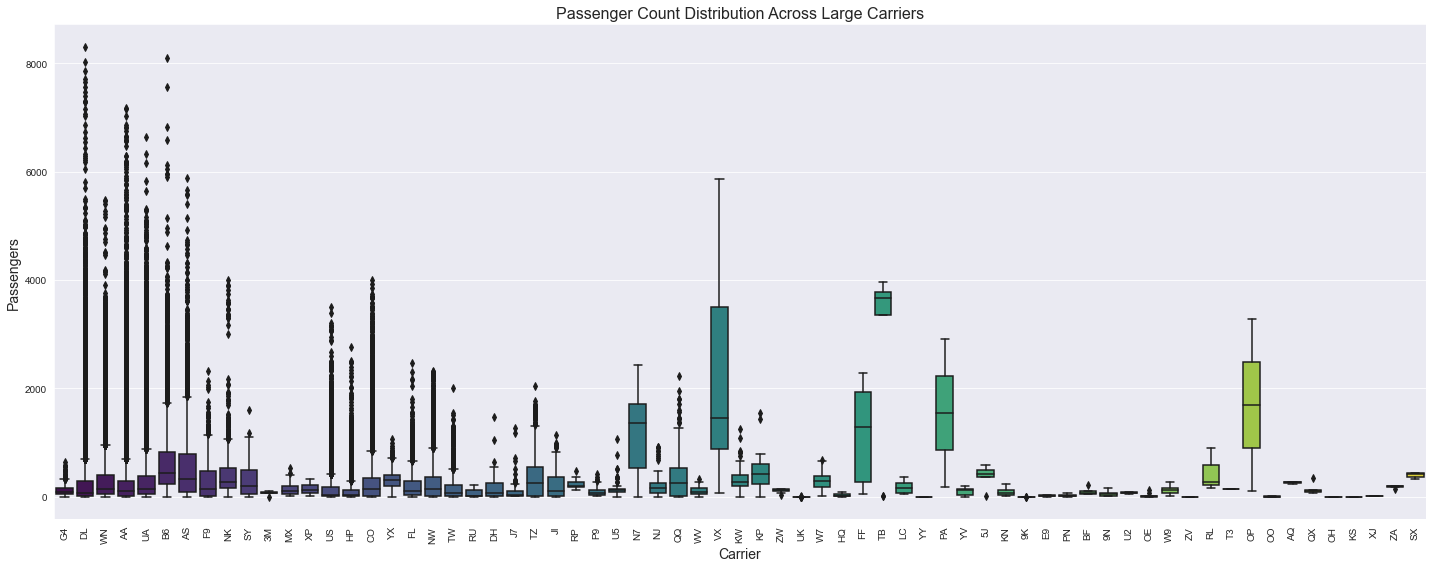

In [152]:
# Box plot for fare distribution
plt.figure(figsize=(20, 8))
sns.boxplot(x='carrier_lg', y='fare', data=df, palette='viridis')
plt.title('Fare Distribution Across Large Carriers', fontsize=16)
plt.xlabel('Carrier', fontsize=14)
plt.ylabel('Fare', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Box plot for passenger count distribution
plt.figure(figsize=(20, 8))
sns.boxplot(x='carrier_lg', y='passengers', data=df, palette='viridis')
plt.title('Passenger Count Distribution Across Large Carriers', fontsize=16)
plt.xlabel('Carrier', fontsize=14)
plt.ylabel('Passengers', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


# How do fare_lg and fare_low compare for the same routes

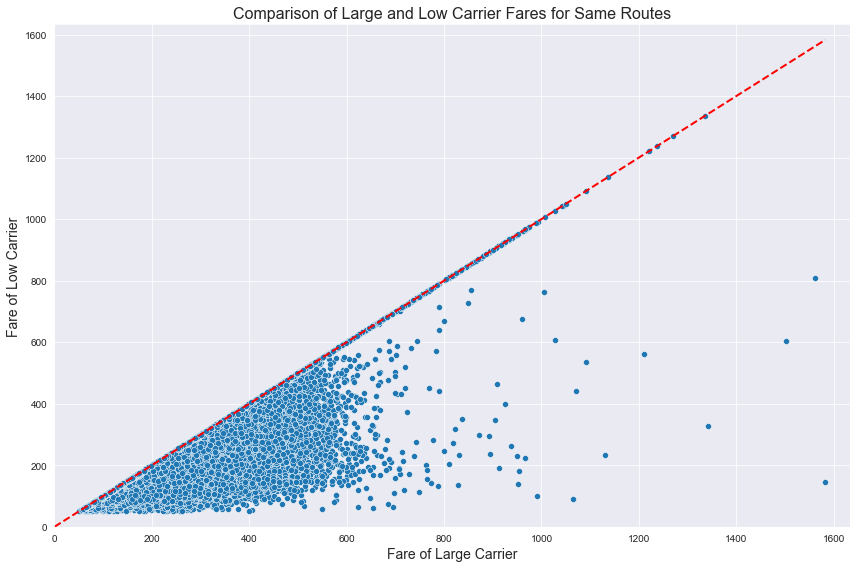

In [153]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='fare_lg', y='fare_low', data=df)

# Add a line of equality for reference
max_fare = max(df['fare_lg'].max(), df['fare_low'].max())
plt.plot([0, max_fare], [0, max_fare], 'r--', linewidth=2)  # Line y=x

plt.title('Comparison of Large and Low Carrier Fares for Same Routes', fontsize=16)
plt.xlabel('Fare of Large Carrier', fontsize=14)
plt.ylabel('Fare of Low Carrier', fontsize=14)
plt.grid(True)
plt.xlim(0, max_fare + 50)
plt.ylim(0, max_fare + 50)
plt.tight_layout()
plt.show()

# How does Market Share (large_ms vs if_ms) vary across different year

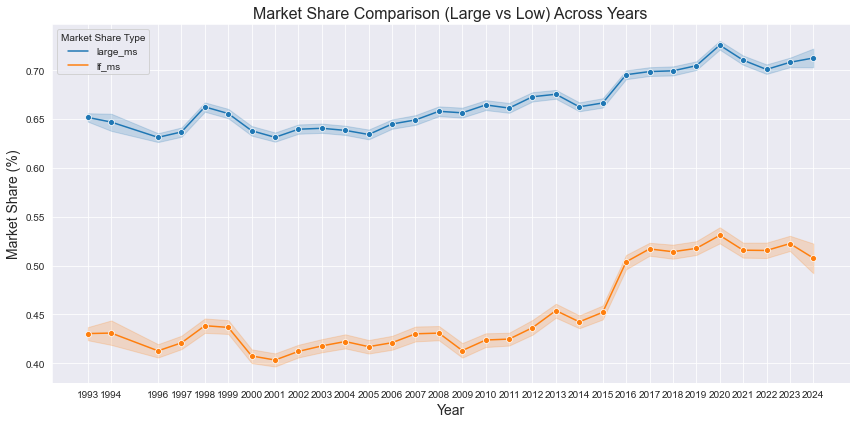

In [154]:
# Melt the DataFrame for easier plotting
df_melted = df.melt(id_vars='Year', value_vars=['large_ms', 'lf_ms'], 
                    var_name='Market Share Type', value_name='Market Share')

# Create a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_melted, x='Year', y='Market Share', hue='Market Share Type', marker='o')

# Titles and labels
plt.title('Market Share Comparison (Large vs Low) Across Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Market Share (%)', fontsize=14)
plt.grid(True)
plt.xticks(df['Year'].unique())  # Set x-ticks to years
plt.tight_layout()
plt.show()

**Statistical Analysis:**

#ANOVA or T-test: Compare fare prices across different carriers to identify significant differences.

- Since we have two groups of carriers (large and low), a T-test is appropriate to compare the mean fare prices between these two groups to determine if there's a statistically significant difference. Specifically, we would perform an independent samples T-test because the two groups (large carriers and low-cost carriers) are independent of each other.

**Null Hypothesis (H₀): There is no significant difference in the fare prices between large carriers and low-cost carriers.**

**Alternative Hypothesis (H₁): There is a significant difference in the fare prices between large carriers and low-cost carriers.**

In [23]:
!python.exe -m pip install --upgrade pippip install --upgrade pip
!pip install statsmodels

  Using cached pippip-0.0.10-py3-none-any.whl.metadata (250 bytes)


ERROR: Could not find a version that satisfies the requirement install (from versions: none)

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for install



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
import sys
sys.path


['C:\\Users\\shreya reddy',
 'C:\\Users\\shreya reddy\\AppData\\Local\\Programs\\Python\\Python39\\python39.zip',
 'C:\\Users\\shreya reddy\\AppData\\Local\\Programs\\Python\\Python39\\DLLs',
 'C:\\Users\\shreya reddy\\AppData\\Local\\Programs\\Python\\Python39\\lib',
 'C:\\Users\\shreya reddy\\AppData\\Local\\Programs\\Python\\Python39',
 '',
 'C:\\Users\\shreya reddy\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages',
 'C:\\Users\\shreya reddy\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\win32',
 'C:\\Users\\shreya reddy\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\shreya reddy\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\Pythonwin']

In [25]:
import sys
import subprocess

# Specify the desired path from your sys.path output
target_path = 'C:\\Users\\shreya reddy\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages'

# Install statsmodels to the specified target path
subprocess.check_call([sys.executable, "-m", "pip", "install", "--target", target_path, "statsmodels"])


0

In [26]:
from statsmodels.stats.weightstats import ttest_ind

# Drop any rows with missing values in 'fare_lg' or 'fare_low'
df_clean = df[['fare_lg', 'fare_low']].dropna()

# Perform the t-test
t_stat, p_value, df_degrees = ttest_ind(df_clean['fare_lg'], df_clean['fare_low'], usevar='unequal')

# Display the results
print("T-statistic:", t_stat)
print("P-value:", p_value)
print("Degrees of Freedom:", df_degrees)


T-statistic: 124.60397589870152
P-value: 0.0
Degrees of Freedom: 422819.8247460524


In [27]:
#Let's quantify the difference in prices for large and low carriers
import scipy.stats as stats
mean_fare_lg = df['fare_lg'].mean()
mean_fare_low = df['fare_low'].mean()

mean_difference = mean_fare_lg - mean_fare_low
print(f"Mean Difference: {mean_difference}")

std_fare_lg = df['fare_lg'].std()
std_fare_low = df['fare_low'].std()
pooled_std = np.sqrt(((std_fare_lg ** 2) + (std_fare_low ** 2)) / 2)

# Calculate Cohen's d
cohens_d = (mean_fare_lg - mean_fare_low) / pooled_std

print(f"Cohen's d: {cohens_d}")

# Calculate the standard error of the difference
n_fare_lg = df['fare_lg'].count()
n_fare_low = df['fare_low'].count()

se_difference = np.sqrt((std_fare_lg ** 2 / n_fare_lg) + (std_fare_low ** 2 / n_fare_low))

# Calculate the confidence interval
confidence_interval = stats.norm.interval(0.95, loc=mean_difference, scale=se_difference)

print(f"95% Confidence Interval for the Mean Difference: {confidence_interval}")
percentage_difference = (mean_difference / mean_fare_low) * 100
print(f"Percentage Difference: {percentage_difference:.2f}%")

Mean Difference: 25.927020296784292
Cohen's d: 0.37929218063574743
95% Confidence Interval for the Mean Difference: (25.51920003549947, 26.334840558069114)
Percentage Difference: 13.65%


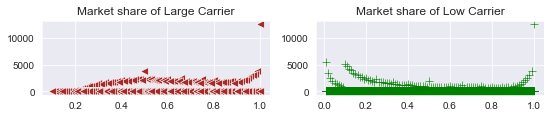

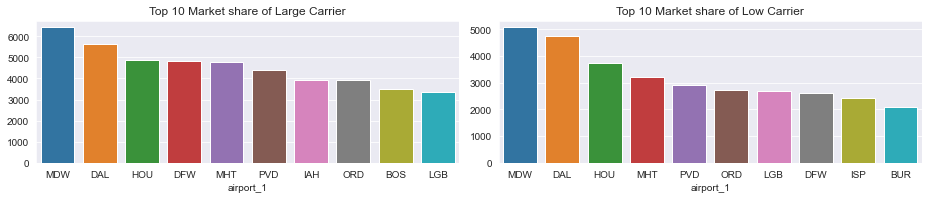

In [28]:
#Market Share Calculation: Determine the market share of each carrier on specific routes.
large_ms_vc = df['large_ms'].value_counts()
low_ms_vc = df['lf_ms'].value_counts()
plt.figure(figsize=(9,3))
plt.subplot(2,2,1)
sns.scatterplot(x=large_ms_vc.index, y=large_ms_vc.values, marker='<', color='brown', s=60)
plt.title("Market share of Large Carrier")

plt.subplot(2,2,2)
sns.scatterplot(x=low_ms_vc.index, y=low_ms_vc.values, marker='+', color='green', s=60)
plt.title("Market share of Low Carrier")

large_ms_airport_1 = df.groupby("airport_1")['large_ms'].sum()
large_ms_airport_1 = large_ms_airport_1.sort_values(ascending=False).head(10)

lf_ms_airport_1 = df.groupby("airport_1")['lf_ms'].sum()
lf_ms_airport_1 = lf_ms_airport_1.sort_values(ascending=False).head(10)

plt.figure(figsize=(13,5))
plt.subplot(2,2,3)
sns.barplot(x=large_ms_airport_1.index, y=large_ms_airport_1.values)
plt.title("Top 10 Market share of Large Carrier")

plt.subplot(2,2,4)
sns.barplot(x=lf_ms_airport_1.index, y=lf_ms_airport_1.values)
plt.title("Top 10 Market share of Low Carrier")

plt.tight_layout()
plt.show()

**Insights from market research analysis graphs are as follows:**

### Highest Fare prices accross different carriers:
- **large carrier**:
    - DFW    1837857.03
    - ORD    1817854.93
    - BOS    1804664.42
    
- **low carrier**:
    - ORD    1617281.90
    - MHT    1548422.38
    - DFW    1505836.97
    
### Fare prices and passenger count Correlation:
- passenger count goes above 8000 when the price of flights is
lower than 600. Lower fare prices is directly proportional to High number of passengers

### Independent Sample T test

- T-statistic (123.56): This value measures the difference between the means of the two groups relative to the variation in their data. A higher absolute value indicates a larger difference.

- P-value (0.0): The p-value tells you the probability that the observed difference between the two groups happened by chance. A p-value of 0.0 (or something extremely close to 0) indicates that the difference in fare prices between large carriers and low-cost carriers is statistically significant.

- Degrees of Freedom (488,684): This is the number of independent pieces of information used to calculate the T-statistic. It’s based on the sample sizes of the two groups.

**Interpretation:**

- Since the p-value is 0.0, which is much lower than the common significance level of 0.05, you can reject the null hypothesis.
- This result suggests that there is a statistically significant difference in fare prices between large carriers and low-cost carriers.

###  The fare for large carriers is about 14.71% higher than that for low-cost carriers

### Market Share Calculations :
- Top 4 Large carriers market share routes: MDW, DAL, DFW, ORD
- Top 4 Low carriers market share routes: MDW, DAL, HOU, ORD

# 3. Route Optimization

**Visualizations:**

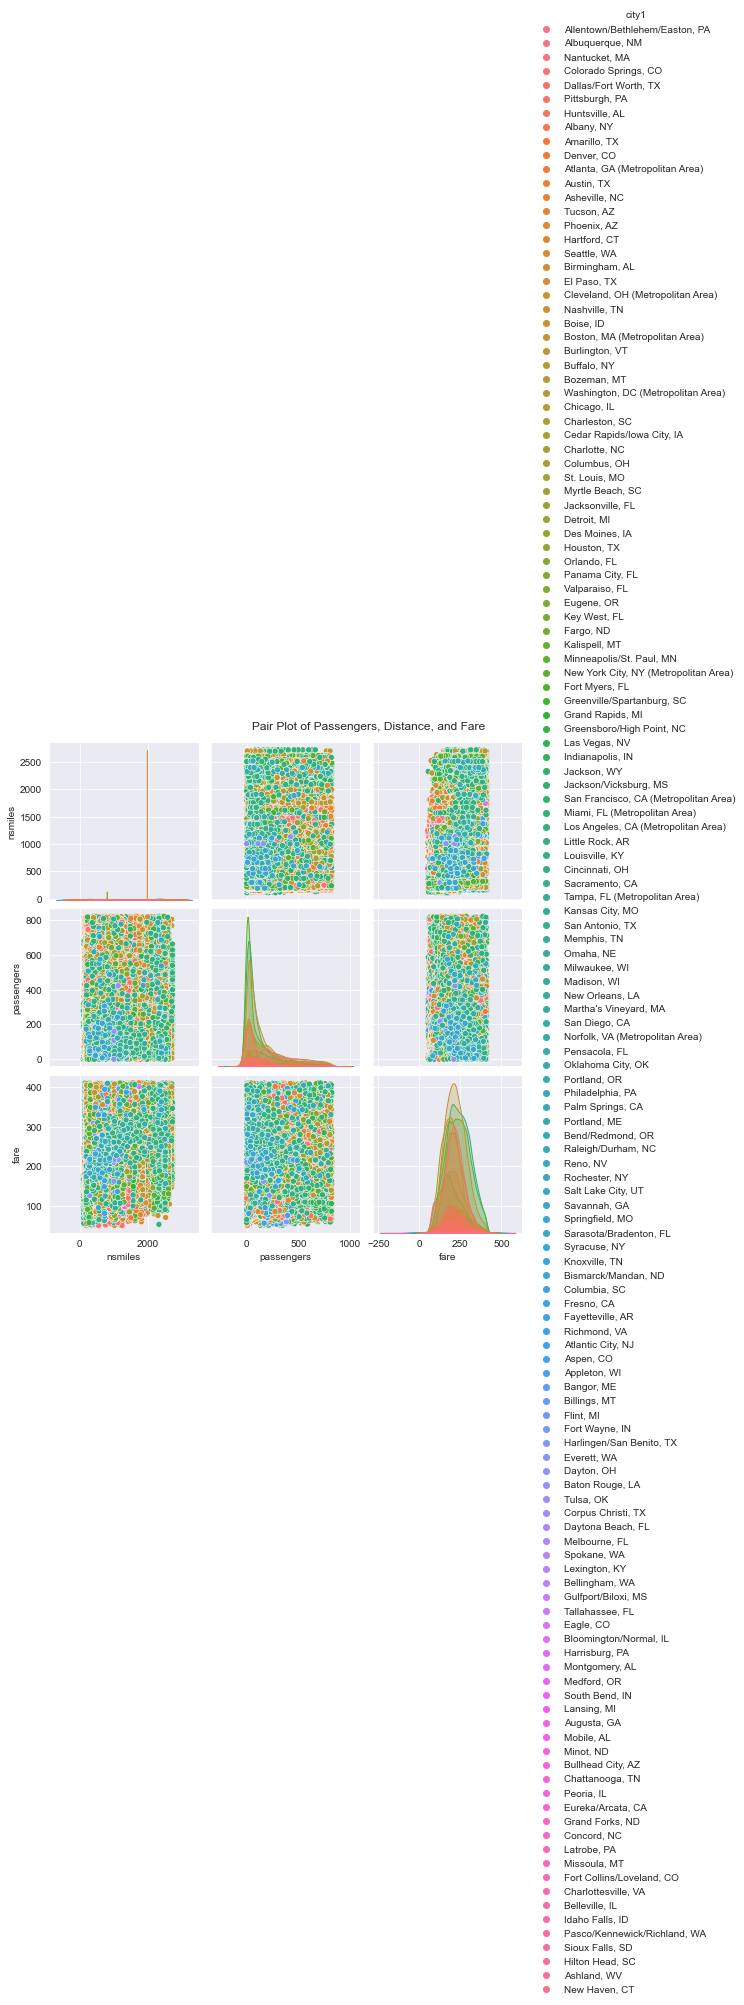

In [29]:
# Pair plot to visualize relationships between variables
sns.pairplot(df, vars=['nsmiles', 'passengers', 'fare'], hue='city1', height=2.5)
plt.suptitle('Pair Plot of Passengers, Distance, and Fare', y=1.02)
plt.show()


**Clustering Analysis**

In [52]:
df[df['passengers'] > 1000]

,Year,quarter,city1,city2,airport_1,airport_2,nsmiles,passengers,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,Fare Binned,cluster


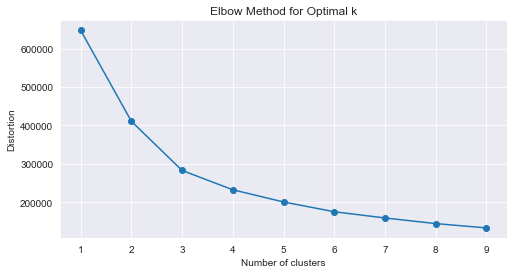

In [31]:
#Let's find an Optimal k
distortions = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_features)
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 10), distortions, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

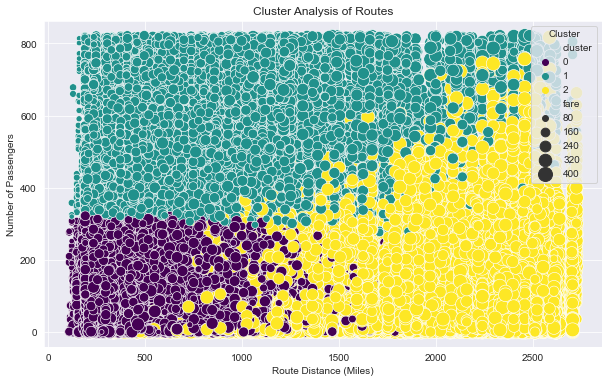

In [32]:
#optimal k = 3
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_features)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='nsmiles', y='passengers', hue='cluster', data=df, palette='viridis', size='fare', sizes=(20, 200))
plt.title("Cluster Analysis of Routes")
plt.xlabel("Route Distance (Miles)")
plt.ylabel("Number of Passengers")
plt.legend(title='Cluster')
plt.show()

**Insights from Route Optimization graphs are as follows:**

### Passenger Traffic:
- It is seen that maximum number of passenger counts per flight falls between 0 - 3000
- Los Angeles is the only city where passenger count has crossed 8000

### Conclusion of Cluster Analysis

The cluster analysis of flight routes has identified three distinct clusters, each representing different types of routes based on the distance traveled and the number of passengers. Here's a summary of the findings:

1. **Cluster 1: Short-Haul, Low-Volume Routes**
   - **Distance:** 0 - 1300 miles
   - **Passengers:** 0 - 1000
   - **Insight:** This cluster represents short-haul routes that typically serve a smaller number of passengers. These routes may be popular for regional or domestic flights, often connecting smaller cities or providing frequent service in high-density areas.

2. **Cluster 2: Medium to Long-Haul, Moderate-Volume Routes**
   - **Distance:** 1300 - 2500 miles and above
   - **Passengers:** 0 - 1200
   - **Insight:** These routes cover medium to long distances and have a moderate passenger volume. They likely include cross-country or international flights that serve medium-sized airports, connecting major cities with a balanced demand.

3. **Cluster 3: All-Distance, High-Volume Routes**
   - **Distance:** All distances
   - **Passengers:** 1200 - 8000 and above
   - **Insight:** Cluster 3 captures the high-volume routes across various distances. These routes are critical for connecting major hubs with large passenger flows, including popular international destinations and key domestic routes.


# Recommendations for Airlines

#### 1. **Optimize Popular Routes**
   - **Action:** Increase frequency or capacity on high-traffic routes such as Miami to Niagara Falls, Louisville to San Diego, and New York City to Omaha. Consider adding additional services or larger aircraft to accommodate high demand.
   - **Insight:** Since these routes have high passenger traffic, optimizing them can improve customer satisfaction and increase revenue.

#### 2. **Adjust for Seasonal Traffic**
   - **Action:** Prepare for increased passenger volumes in the second quarter by scaling up services. This could include adding flights, adjusting schedules, or offering promotions to manage demand.
   - **Insight:** Understanding seasonal variations allows airlines to better plan capacity and marketing efforts to match peak travel times.

#### 3. **Analyze and Adapt Fare Pricing**
   - **Action:** Implement dynamic pricing strategies based on passenger volume and fare prices. For routes where lower fares lead to higher passenger numbers, consider adjusting pricing strategies to balance revenue and load factors.
   - **Insight:** The correlation between fare prices and passenger volume suggests that optimizing fare pricing could enhance overall profitability.

#### 4. **Evaluate Carrier Performance**
   - **Action:** Compare fare prices and passenger counts across different carriers. For routes with significant differences in fares, investigate why low-cost carriers have higher passenger numbers and assess if similar strategies can be applied to large carriers.
   - **Insight:** Large carriers have higher fare prices, which might limit their market share compared to low-cost carriers. Consider strategies to enhance competitive pricing without compromising service quality.

#### 5. **Focus on High-Volume Routes for Market Share**
   - **Action:** Expand services on routes with high passenger counts and explore opportunities to gain market share in key cities such as Chicago, Los Angeles, New York City, and Washington DC.
   - **Insight:** High-volume routes represent significant opportunities for growth and increased market presence.

#### 6. **Address Passenger Decline During 2020**
   - **Action:** Use insights from the decline in passenger traffic during 2020 to inform future strategies for handling similar disruptions. Implement flexible booking policies and health safety measures to mitigate impacts during crises.
   - **Insight:** Preparing for future disruptions with contingency plans can help airlines manage passenger flows during unexpected events.

#### 7. **Optimize Routes Based on Clustering Analysis**
   - **Action:** Focus on high-volume routes identified in Cluster 3 for expansion and route optimization. For short-haul and medium-haul routes (Clusters 1 and 2), ensure efficient operations and explore opportunities for improvement.
   - **Insight:** Tailoring strategies to different clusters of routes can improve operational efficiency and customer satisfaction.